<a href="https://colab.research.google.com/github/Zamoca42/TIL/blob/main/AI/HW_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

과제 4. 

필기체 구분하는 인공신경망 CNN으로 학습하고 보고서 작성

수업시간에 작성한 MNIST 데이터를 구분하는 CNN 에서
layer 숫자, units 숫자, activation, epoch 등 바꿔보면서 정확도 등을 평가

313/313 - 1s - loss: 0.0822 - accuracy: 0.9867 - 782ms/epoch - 2ms/step
test loss: 0.08221866190433502
test accuracy: 0.9866999983787537


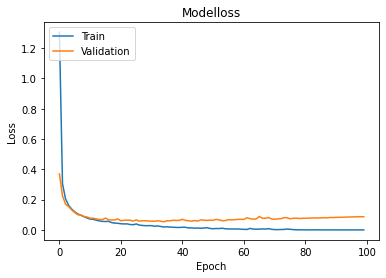

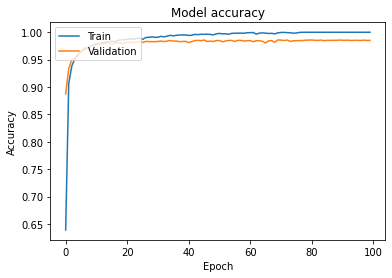

In [ ]:
# 기준

import tensorflow
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# MNIST 데이터셋 불러오기
(X_train, Y_train),(X_test,Y_test) = keras.datasets.mnist.load_data()

# 데이터 전처리하기
X_train, X_test = X_train.astype('float32')/255.0 , X_test.astype('float32')/255.0

X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

# 신경망 구성하기
# Conv2D(filter,kernel_size,strides,activation,input_shape)
# filter = 필터 개수
# kernel_size = 필터의 크기
# strides = 풀링 필터를 이동시키는 간격

model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(64, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(64, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(), # **2D 데이터를 1D 데이터로 변환
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax'),
])

# model.summary()

# 모델 컴파일
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# 훈련하기
hist = model.fit(X_train, Y_train, batch_size = 1000, epochs = 100, validation_split=0.2, verbose = 0)

# 평가
loss, acc = model.evaluate(X_test,Y_test, verbose=2)
print("test loss:", loss)
print("test accuracy:", acc)

# 그래프로 보기
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Modelloss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

313/313 - 1s - loss: 0.0476 - accuracy: 0.9864 - 809ms/epoch - 3ms/step
test loss: 0.04761309176683426
test accuracy: 0.9864000082015991


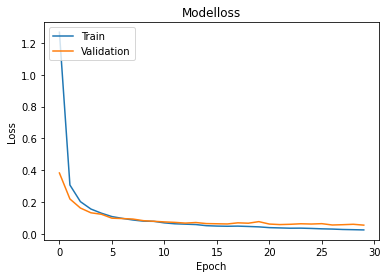

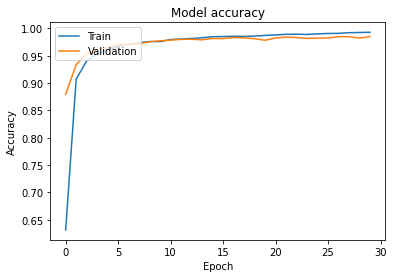

In [ ]:
# epoch 30

import tensorflow
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# MNIST 데이터셋 불러오기
(X_train, Y_train),(X_test,Y_test) = keras.datasets.mnist.load_data()

# 데이터 전처리하기
X_train, X_test = X_train.astype('float32')/255.0 , X_test.astype('float32')/255.0

X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(64, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(64, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(), # **2D 데이터를 1D 데이터로 변환
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax'),
])

# 모델 컴파일
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# 훈련하기
hist = model.fit(X_train, Y_train, batch_size = 1000, epochs = 30, validation_split=0.2, verbose = 0)

# 평가
loss, acc = model.evaluate(X_test,Y_test, verbose=2)
print("test loss:", loss)
print("test accuracy:", acc)

# 그래프로 보기
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Modelloss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

313/313 - 1s - loss: 0.7364 - accuracy: 0.7506 - 1s/epoch - 5ms/step
test loss: 0.7364123463630676
test accuracy: 0.7505999803543091


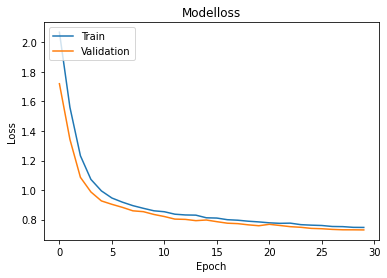

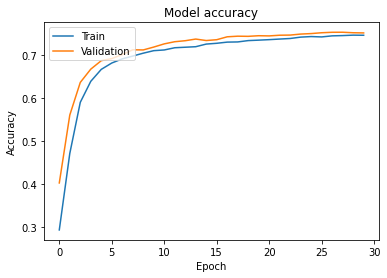

In [ ]:
# model에서 Conv2D의 kernel size를 1로 변경

import tensorflow
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# MNIST 데이터셋 불러오기
(X_train, Y_train),(X_test,Y_test) = keras.datasets.mnist.load_data()

# 데이터 전처리하기
X_train, X_test = X_train.astype('float32')/255.0 , X_test.astype('float32')/255.0

X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

# 신경망 구성하기
model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=1, activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(64, kernel_size=1, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(64, kernel_size=1, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(), # **2D 데이터를 1D 데이터로 변환
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax'),
])

# 모델 컴파일
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# 훈련하기
hist = model.fit(X_train, Y_train, batch_size = 1000, epochs = 30, validation_split=0.2, verbose = 0)

# 평가
loss, acc = model.evaluate(X_test,Y_test, verbose=2)
print("test loss:", loss)
print("test accuracy:", acc)

# 그래프로 보기
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Modelloss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

313/313 - 1s - loss: 0.0594 - accuracy: 0.9849 - 879ms/epoch - 3ms/step
test loss: 0.05937687307596207
test accuracy: 0.9848999977111816


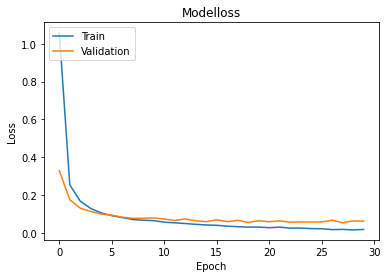

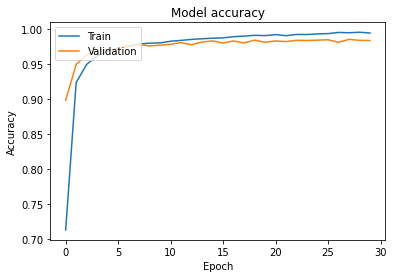

In [ ]:
# model에서 Conv2D의 filter의 개수를 32 -> 128로 변경

import tensorflow
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# MNIST 데이터셋 불러오기
(X_train, Y_train),(X_test,Y_test) = keras.datasets.mnist.load_data()

# 데이터 전처리하기
X_train, X_test = X_train.astype('float32')/255.0 , X_test.astype('float32')/255.0

X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

# 신경망 구성하기
model = keras.models.Sequential([
    keras.layers.Conv2D(128, kernel_size=3, activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(64, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(64, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(), # **2D 데이터를 1D 데이터로 변환
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax'),
])

# 모델 컴파일
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# 훈련하기
hist = model.fit(X_train, Y_train, batch_size = 1000, epochs = 30, validation_split=0.2, verbose = 0)

# 평가
loss, acc = model.evaluate(X_test,Y_test, verbose=2)
print("test loss:", loss)
print("test accuracy:", acc)

# 그래프로 보기
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Modelloss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

313/313 - 1s - loss: 0.0520 - accuracy: 0.9841 - 795ms/epoch - 3ms/step
test loss: 0.05195587873458862
test accuracy: 0.9840999841690063


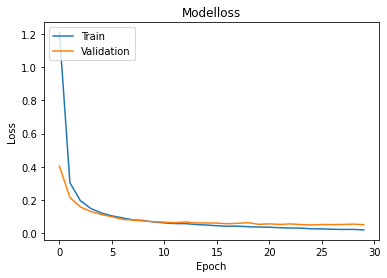

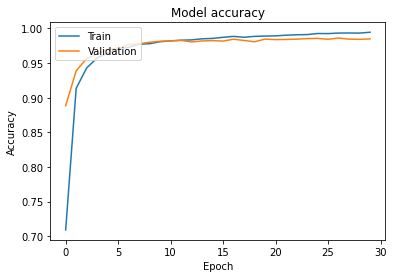

In [ ]:
# dense layer의 activation을 tanh로 바꾼다

import tensorflow
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# MNIST 데이터셋 불러오기
(X_train, Y_train),(X_test,Y_test) = keras.datasets.mnist.load_data()

# 데이터 전처리하기
X_train, X_test = X_train.astype('float32')/255.0 , X_test.astype('float32')/255.0

X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(64, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(64, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(), # **2D 데이터를 1D 데이터로 변환
    keras.layers.Dense(units=64, activation='tanh'),
    keras.layers.Dense(units=10, activation='softmax'),
])

# 모델 컴파일
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# 훈련하기
hist = model.fit(X_train, Y_train, batch_size = 1000, epochs = 30, validation_split=0.2, verbose = 0)

# 평가
loss, acc = model.evaluate(X_test,Y_test, verbose=2)
print("test loss:", loss)
print("test accuracy:", acc)

# 그래프로 보기
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Modelloss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

313/313 - 1s - loss: 0.0551 - accuracy: 0.9844 - 800ms/epoch - 3ms/step
test loss: 0.05509534478187561
test accuracy: 0.9843999743461609


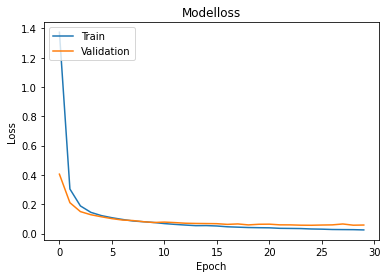

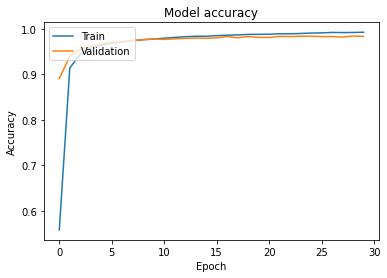

In [ ]:
# dense layer units를 64->16으로 줄여봄

import tensorflow
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# MNIST 데이터셋 불러오기
(X_train, Y_train),(X_test,Y_test) = keras.datasets.mnist.load_data()

# 데이터 전처리하기
X_train, X_test = X_train.astype('float32')/255.0 , X_test.astype('float32')/255.0

X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(64, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(64, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(), # **2D 데이터를 1D 데이터로 변환
    keras.layers.Dense(units=16, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax'),
])

# 모델 컴파일
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# 훈련하기
hist = model.fit(X_train, Y_train, batch_size = 1000, epochs = 30, validation_split=0.2, verbose = 0)

# 평가
loss, acc = model.evaluate(X_test,Y_test, verbose=2)
print("test loss:", loss)
print("test accuracy:", acc)

# 그래프로 보기
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Modelloss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# 최적화

import tensorflow
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# MNIST 데이터셋 불러오기
(X_train, Y_train),(X_test,Y_test) = keras.datasets.mnist.load_data()

# 데이터 전처리하기
X_train, X_test = X_train.astype('float32')/255.0 , X_test.astype('float32')/255.0

X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

model = keras.models.Sequential([
    keras.layers.Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(32, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(32, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(), # **2D 데이터를 1D 데이터로 변환
    keras.layers.Dense(units=16, activation='tanh'),
    keras.layers.Dense(units=10, activation='softmax'),
])

# 모델 컴파일
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# 훈련하기
hist = model.fit(X_train, Y_train, batch_size = 500, epochs = 25, validation_split=0.2, verbose = 0)

# 평가
loss, acc = model.evaluate(X_test,Y_test, verbose=2)
print("test loss:", loss)
print("test accuracy:", acc)

# 그래프로 보기
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Modelloss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

n: 617
1/1 [==============================] - 0s 217ms/step
predict:  [7]
True_value : 7


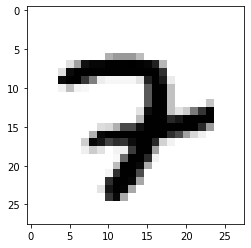

n: 9310
1/1 [==============================] - 0s 23ms/step
predict:  [0]
True_value : 0


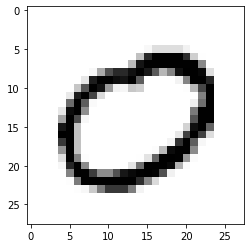

n: 511
1/1 [==============================] - 0s 18ms/step
predict:  [4]
True_value : 4


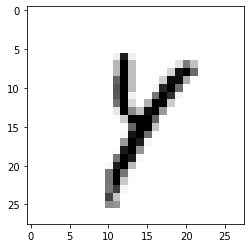

n: 1909
1/1 [==============================] - 0s 16ms/step
predict:  [1]
True_value : 1


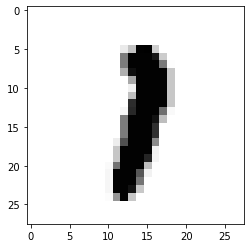

n: 3110
1/1 [==============================] - 0s 19ms/step
predict:  [3]
True_value : 3


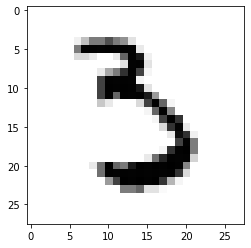

n: 1102
1/1 [==============================] - 0s 16ms/step
predict:  [5]
True_value : 5


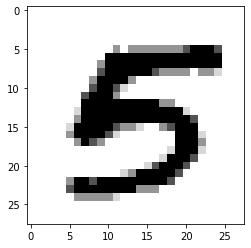

n: 8443
1/1 [==============================] - 0s 18ms/step
predict:  [1]
True_value : 1


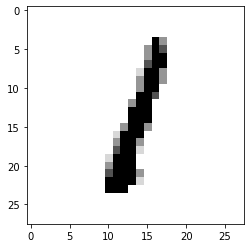

n: 432
1/1 [==============================] - 0s 17ms/step
predict:  [4]
True_value : 4


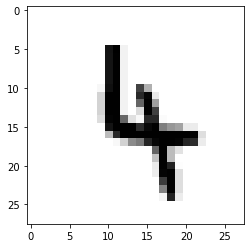

n: 3289
1/1 [==============================] - 0s 18ms/step
predict:  [8]
True_value : 8


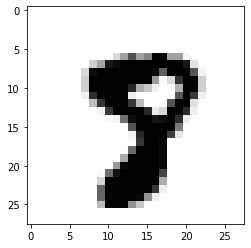

n: 5837
1/1 [==============================] - 0s 16ms/step
predict:  [9]
True_value : 9


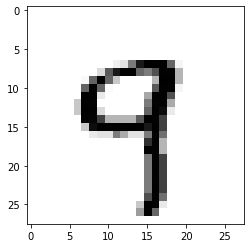

In [ ]:
# prediction과 맞는지 비교

for i in range(10):
  n = int(np.random.rand()*10000)
  print("n:", n)
  print("predict: ", np.argmax(model.predict(X_test[n].reshape(1,28,28,1)),axis=1))
  print("True_value :", Y_test[n])

  plt.imshow(X_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
  plt.show()